<a href="https://colab.research.google.com/github/Kevoen/Google_Colab_Rep/blob/master/yolov4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
!ls

drive  sample_data


In [27]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 13939, done.
remote: Total 13939 (delta 0), reused 0 (delta 0), pack-reused 13939
Receiving objects: 100% (13939/13939), 12.42 MiB | 5.71 MiB/s, done.
Resolving deltas: 100% (9524/9524), done.


In [28]:
!head darknet/Makefile

GPU=0
CUDNN=0
CUDNN_HALF=0
OPENCV=0
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



## 参数说明
- GPU=1调用GPU CUDA
- CUDNN=1 调用cuDNN v5-7加速训练
- CUDNN_HALF=1调用Tensor Core（通常用于Titan V /Tesla V100/DGX-2 and later）检测加速3倍，训练加速2倍
- OPENCV=1 调用OpenCV用于影像检测

In [29]:
!sed -i "s/GPU=0/GPU=1/g" ./darknet/Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" ./darknet/Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" ./darknet/Makefile

In [30]:
!head darknet/Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [31]:
cd darknet/

/content/darknet


In [32]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [33]:
ls

3rdparty/   CMakeLists.txt          image_yolov3.sh*        README.md
backup/     darknet*                include/                results/
build/      DarknetConfig.cmake.in  json_mjpeg_streams.sh*  scripts/
build.ps1*  darknet.py              LICENSE                 src/
build.sh*   darknet_video.py        Makefile                video_v2.sh*
cfg/        data/                   net_cam_v3.sh*          video_yolov3.sh*
cmake/      image_yolov2.sh*        obj/


In [34]:
!./darknet

usage: ./darknet <function>


In [35]:
cd ..

/content


## 下载权值
https://drive.google.com/file/d/1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

In [36]:
!gdown https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT

Downloading...
From: https://drive.google.com/uc?id=1cewMfusmPjYWbrnuJRuKhPMwRe_b9PaT
To: /content/yolov4.weights
258MB [00:02, 91.3MB/s]


In [ ]:
cd ..

/content/drive/My Drive/Colab_Notebooks/yolov4


In [37]:
!ls darknet/data

9k.tree     eagle.jpg	 imagenet.labels.list	   person.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  scream.jpg
coco.names  goal.txt	 labels			   voc.names
dog.jpg     horses.jpg	 openimages.names


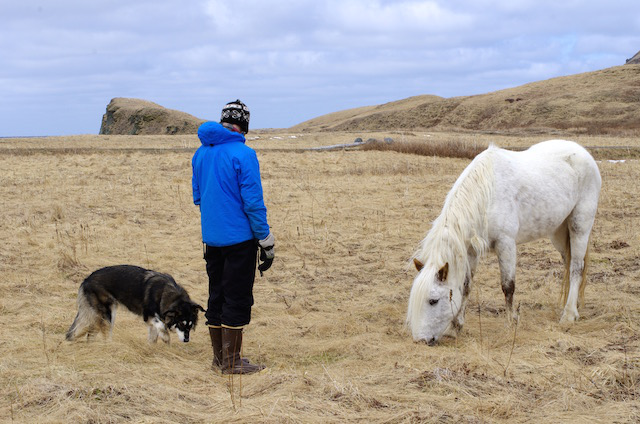

In [38]:
from PIL import Image
Image.open('./darknet/data/person.jpg')

In [39]:
!cd darknet/;./darknet detect ./cfg/yolov4.cfg ../yolov4.weights ./data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   9 rou

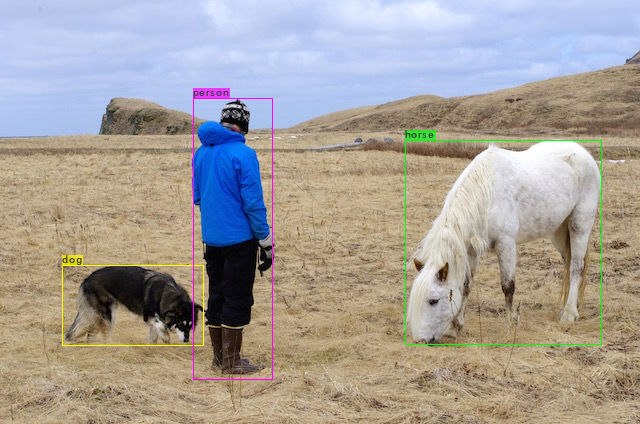

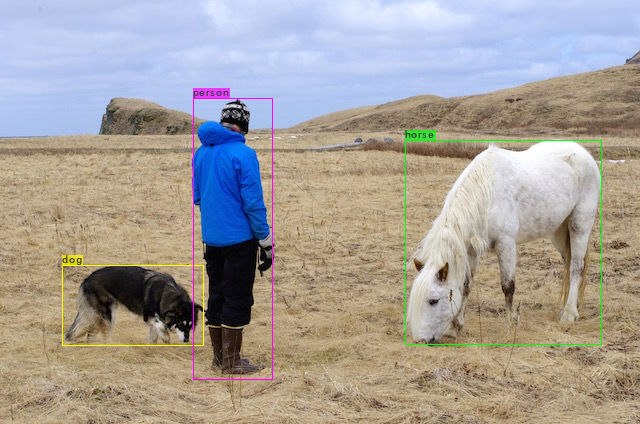

In [41]:
from PIL import Image
Image.open('/content/darknet/predictions.jpg')